In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import keras
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [2]:
data_train = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
data_test = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

In [3]:
X = np.array(data_train.iloc[:,1:]) # X - train images
y = to_categorical(np.array(data_train.iloc[:,0])) # Y - train labels

In [4]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2) #splitting train and val data 

In [5]:
X_test = np.array(data_test.iloc[:, 1:]) # test images
y_test = to_categorical(np.array(data_test.iloc[:, 0])) # test labels

In [6]:
img_rows, img_cols = 28,28
input_shape = (img_rows,img_cols,1)

In [7]:
X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_train = X_train/255

In [8]:
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)
X_test = X_test/255

In [9]:
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val/255

In [10]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3,3), activation="relu", input_shape=input_shape))
model.add(MaxPooling2D((2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(10, activation="softmax"))

In [11]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2769152   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [13]:
train1 = model.fit(X_train,y_train, batch_size=256, epochs=30, validation_data=(X_val, y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 [==============================] - 56s 1ms/step - loss: 0.4812 - acc: 0.8453 - val_loss: 0.3061 - val_acc: 0.8861
Epoch 2/30
48000/48000 [==============================] - 56s 1ms/step - loss: 0.2701 - acc: 0.9020 - val_loss: 0.2734 - val_acc: 0.8992
Epoch 3/30
48000/48000 [==============================] - 57s 1ms/step - loss: 0.2202 - acc: 0.9194 - val_loss: 0.2555 - val_acc: 0.9107
Epoch 4/30
48000/48000 [==============================] - 57s 1ms/step - loss: 0.1891 - acc: 0.9293 - val_loss: 0.2598 - val_acc: 0.9114
Epoch 5/30
48000/48000 [==============================] - 57s 1ms/step - loss: 0.1661 - acc: 0.9384 - val_loss: 0.2619 - val_acc: 0.9125
Epoch 6/30
48000/48000 [==============================] - 58s 1ms/step - loss: 0.1515 - acc: 0.9432 - val_loss: 0.2674 - val_acc: 0.9141
Epoch 7/30
48000/48000 [==============================] - 57s 1ms/step - loss: 0.1322 - acc: 0.9492 - val_loss: 0.2824 - val_acc

In [14]:
score1 = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Test loss: 0.4220308536624536
Test accuracy: 0.9189


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
acc = train1.history['acc']
val_acc = train1.history['val_acc']
loss = train1.history['loss']
val_loss = train1.history['val_loss']
epochs = range(len(acc))

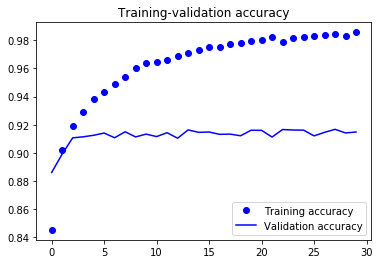

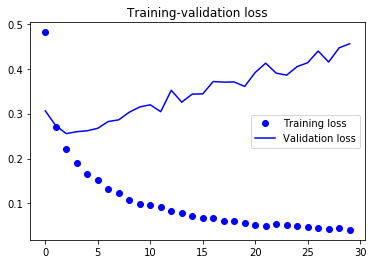

In [17]:
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training-validation accuracy')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training-validation loss')
plt.legend()
plt.show()


In [18]:
# get the predictions for the test data
predicted_classes = model.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [19]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(10)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

             precision    recall  f1-score   support

    Class 0       0.84      0.90      0.87      1000
    Class 1       0.99      0.98      0.99      1000
    Class 2       0.88      0.87      0.88      1000
    Class 3       0.93      0.93      0.93      1000
    Class 4       0.86      0.90      0.88      1000
    Class 5       0.99      0.97      0.98      1000
    Class 6       0.83      0.72      0.77      1000
    Class 7       0.96      0.96      0.96      1000
    Class 8       0.95      0.99      0.97      1000
    Class 9       0.95      0.98      0.96      1000

avg / total       0.92      0.92      0.92     10000

